In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [12]:

data = pd.read_csv('Bengaluru_house_prices.csv')


print(data.head())


              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [13]:
data.describe()


,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [14]:
data.dtypes


area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [15]:
data.shape


(13320, 9)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


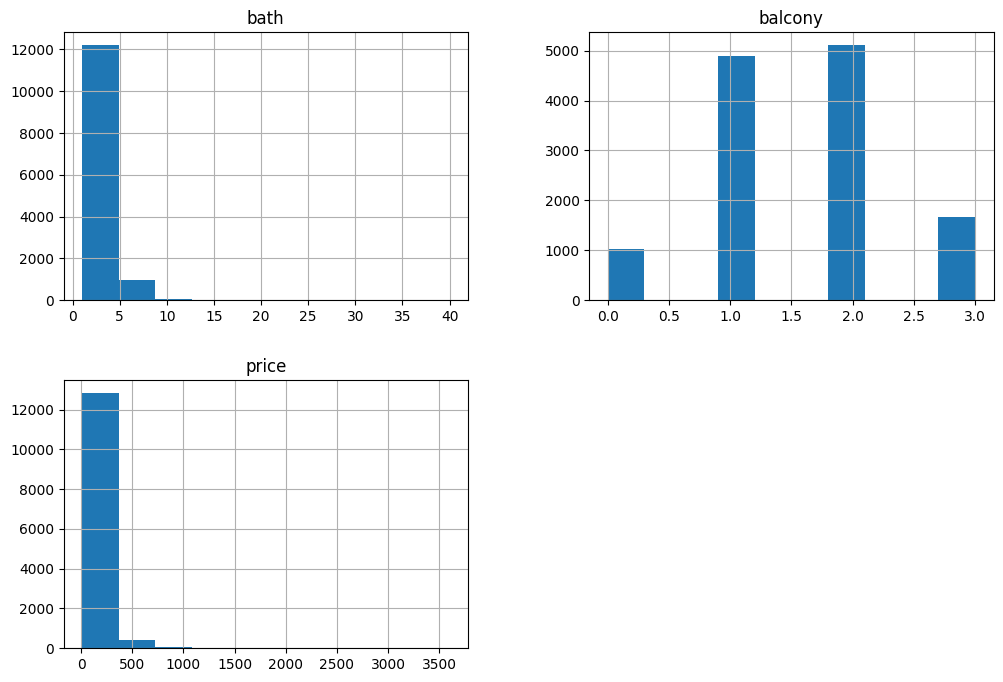

In [17]:
data.hist(figsize=(12, 8))
plt.show()


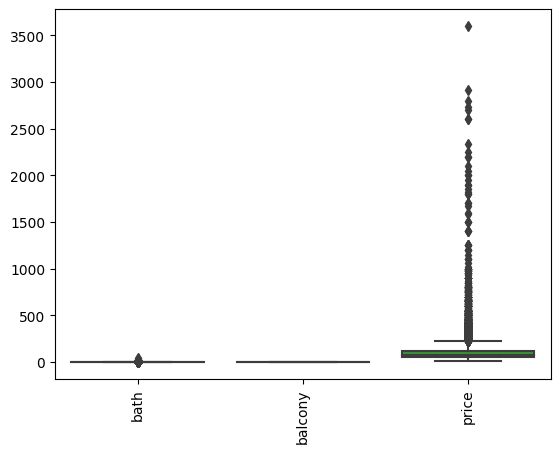

In [22]:
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()



C:\Users\Sufia\AppData\Local\Temp\ipykernel_12980\2622369421.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


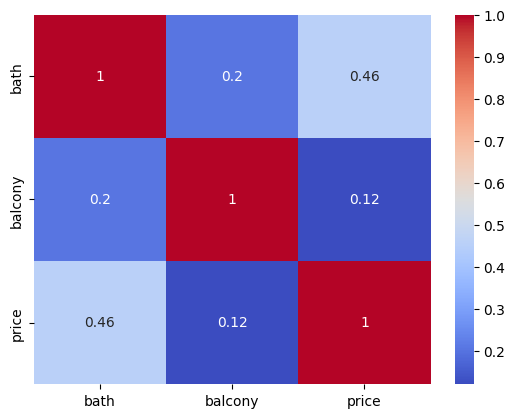

In [23]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


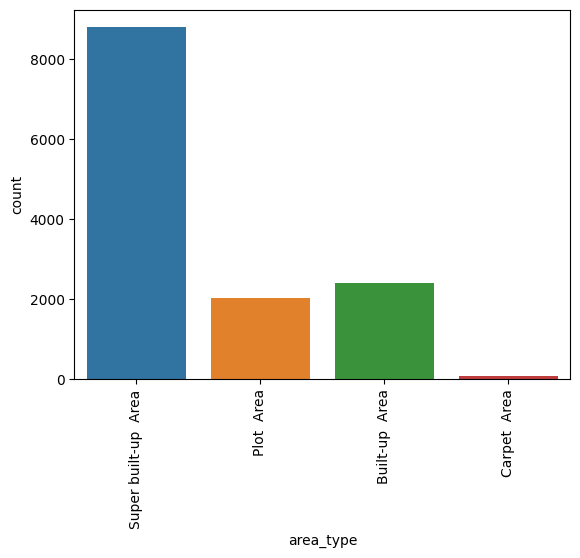

In [25]:
sns.countplot(x='area_type', data=data)
plt.xticks(rotation=90)
plt.show()


In [26]:
data.isnull().sum()*100/data.shape[0]

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

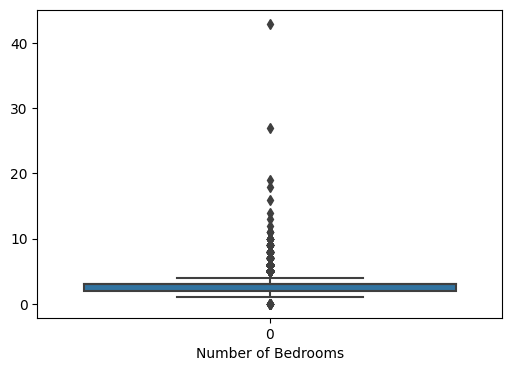

In [33]:

data['size'].fillna('0 BHK', inplace=True)


data['bedrooms'] = data['size'].str.extract('(\d+)').astype(int)


plt.figure(figsize=(6, 4))
sns.boxplot(data['bedrooms'])
plt.xlabel('Number of Bedrooms')
plt.show()




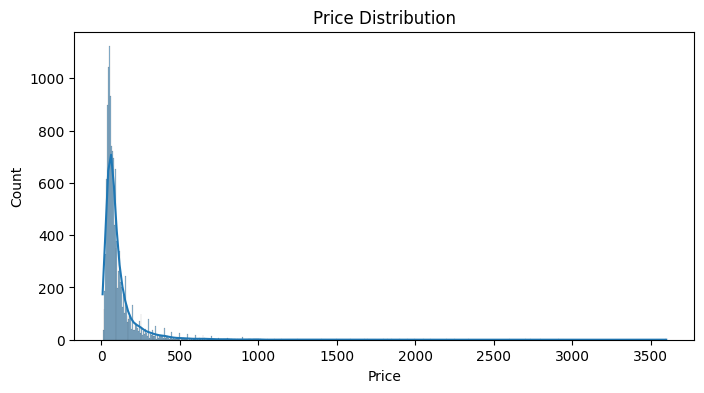

In [34]:

plt.figure(figsize=(8, 4))
sns.histplot(data['price'], kde=True)
plt.xlabel('Price')
plt.title('Price Distribution')
plt.show()


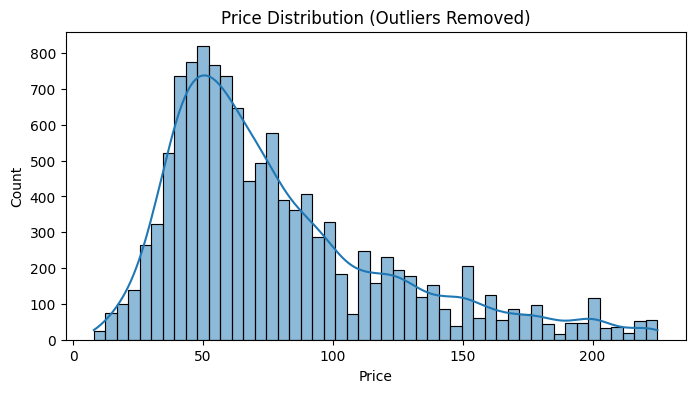

In [35]:

Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]


data_no_outliers = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]


plt.figure(figsize=(8, 4))
sns.histplot(data_no_outliers['price'], kde=True)
plt.xlabel('Price')
plt.title('Price Distribution (Outliers Removed)')
plt.show()


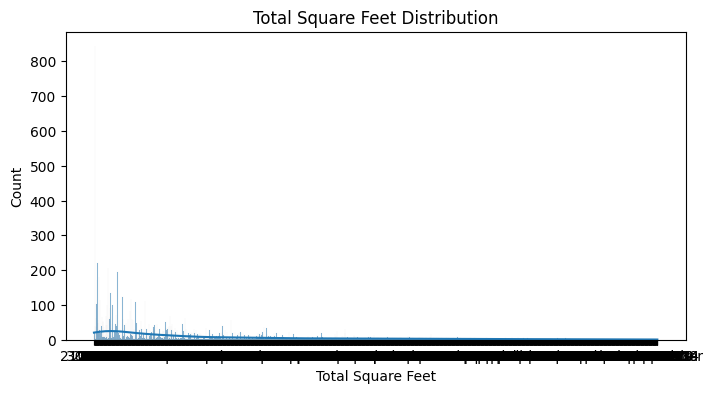

In [38]:

plt.figure(figsize=(8, 4))
sns.histplot(data['total_sqft'], kde=True)
plt.xlabel('Total Square Feet')
plt.title('Total Square Feet Distribution')
plt.show()



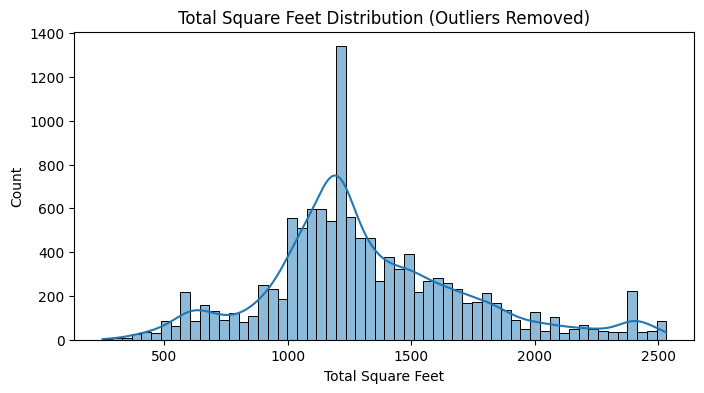

In [41]:




data['total_sqft'] = data['total_sqft'].str.extract('(\d+\.\d+|\d+)').astype(float)

Q1 = data['total_sqft'].quantile(0.25)
Q3 = data['total_sqft'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['total_sqft'] < lower_bound) | (data['total_sqft'] > upper_bound)]


data_no_outliers = data[(data['total_sqft'] >= lower_bound) & (data['total_sqft'] <= upper_bound)]


plt.figure(figsize=(8, 4))
sns.histplot(data_no_outliers['total_sqft'], kde=True)
plt.xlabel('Total Square Feet')
plt.title('Total Square Feet Distribution (Outliers Removed)')
plt.show()




C:\Users\Sufia\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


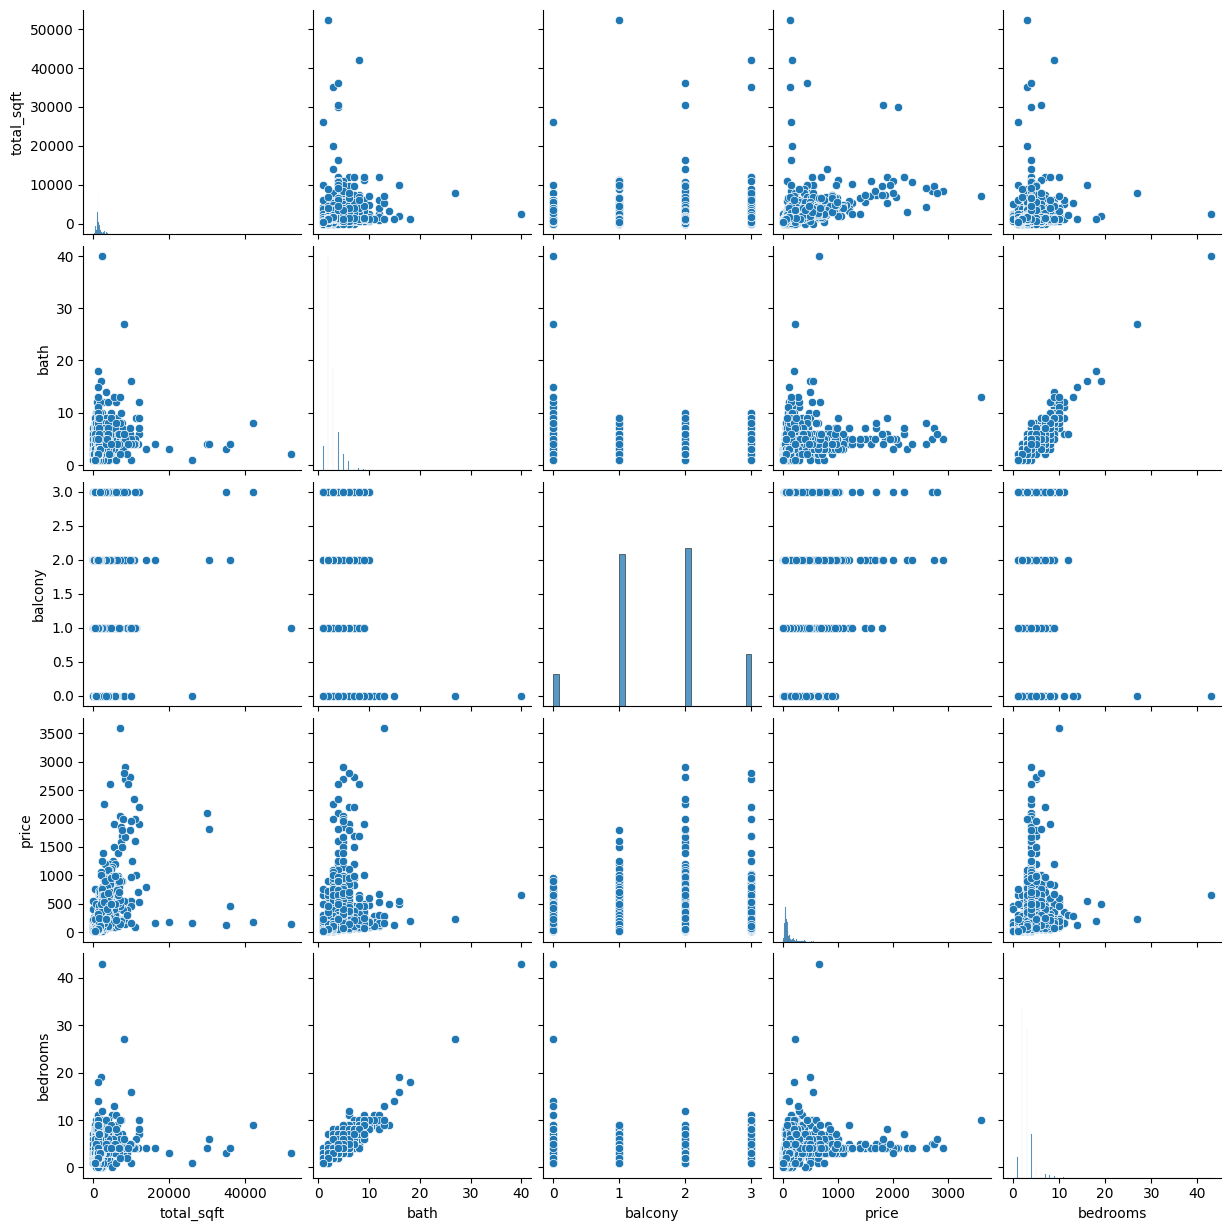

In [43]:
sns.pairplot(data)
plt.show()

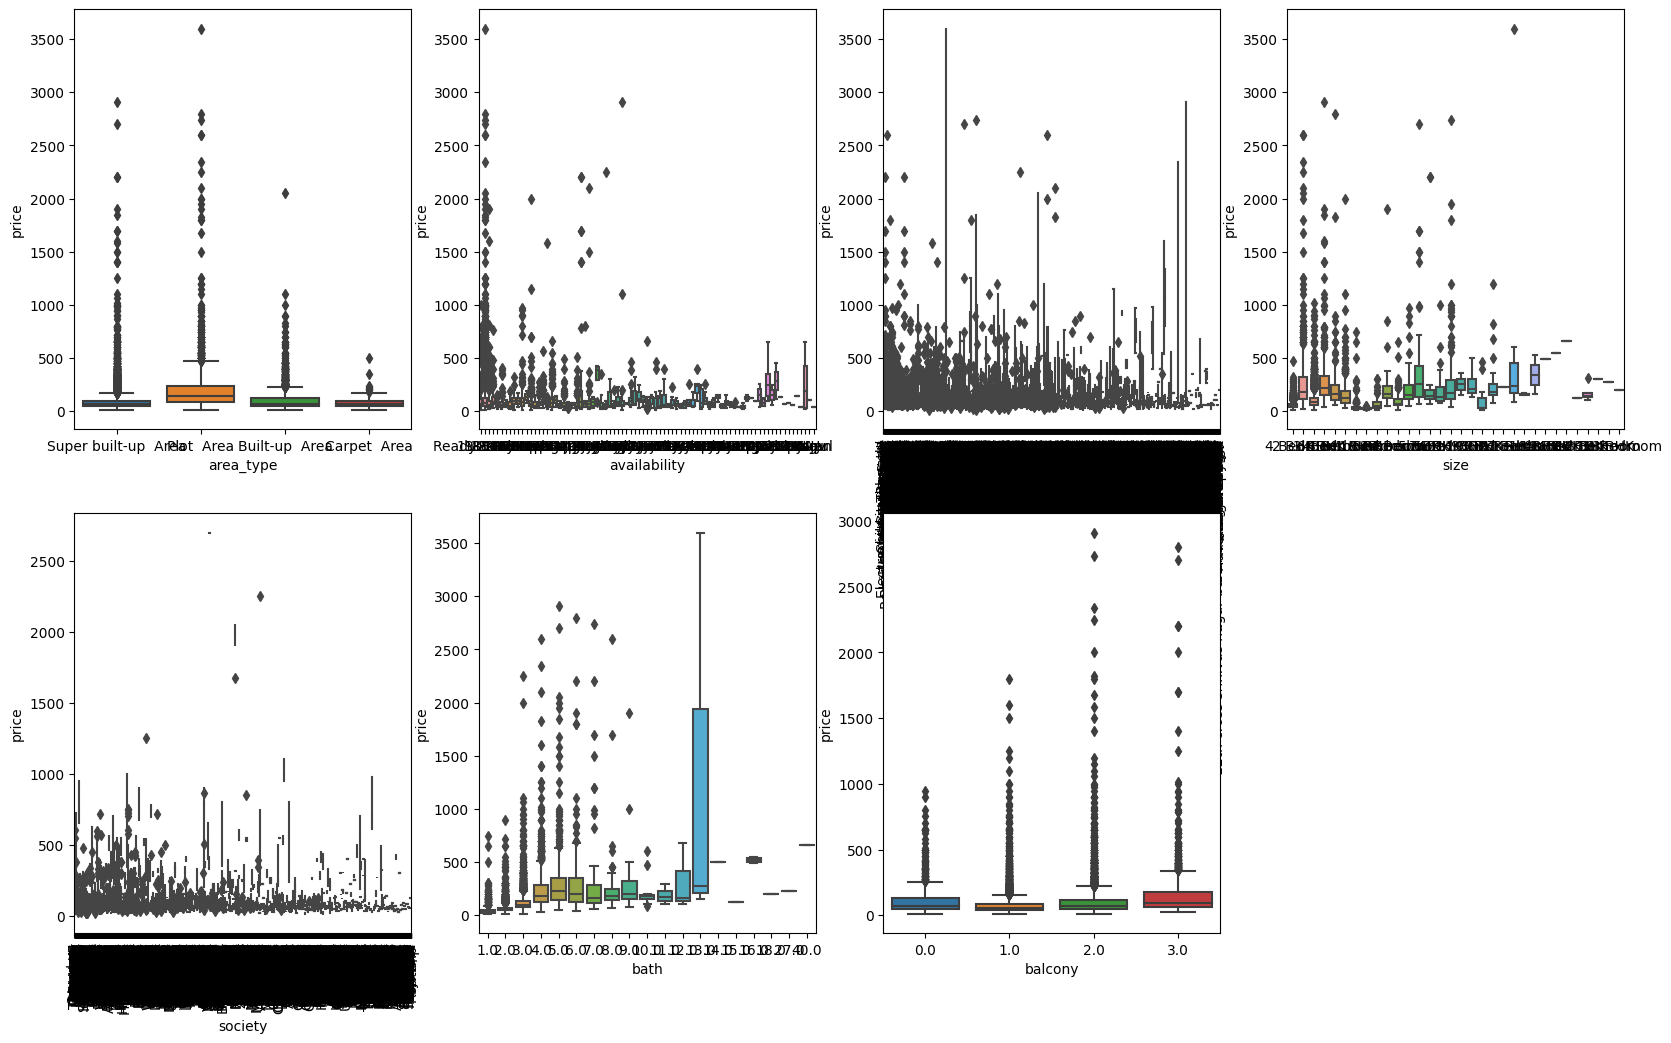

In [46]:


plt.figure(figsize=(20, 12))


plt.subplot(2, 4, 1)
sns.boxplot(x='area_type', y='price', data=data)

plt.subplot(2, 4, 2)
sns.boxplot(x='availability', y='price', data=data)

plt.subplot(2, 4, 3)
sns.boxplot(x='location', y='price', data=data)
plt.xticks(rotation=90)  

plt.subplot(2, 4, 4)
sns.boxplot(x='size', y='price', data=data)

plt.subplot(2, 4, 5)
sns.boxplot(x='society', y='price', data=data)
plt.xticks(rotation=90)  

plt.subplot(2, 4, 6)
sns.boxplot(x='bath', y='price', data=data)

plt.subplot(2, 4, 7)
sns.boxplot(x='balcony', y='price', data=data)

plt.show()


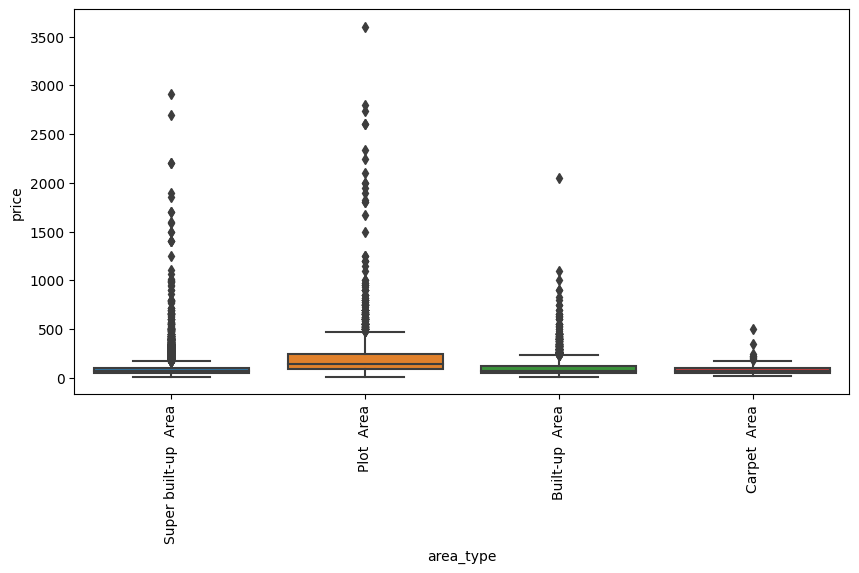

In [49]:



plt.figure(figsize=(10, 5))
sns.boxplot(x='area_type', y='price', data=data)
plt.xticks(rotation=90)  
plt.show()




In [51]:


binary_mapping = {'yes': 1, 'no': 0}



In [55]:



data = pd.DataFrame({
    'area_type': ['Super built-up Area', 'Plot Area', 'Built-up Area', 'Super built-up Area'],
    'availability': ['19-Dec', 'Ready To Move', 'Ready To Move', 'Ready To Move'],
    'location': ['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', 'Lingadheeranahalli'],
    'size': ['2 BHK', '4 Bedroom', '3 BHK', '3 BHK'],
    'total_sqft': ['1056', '2600', '1440', '1521'],
    'bath': ['2', '5', '2', '3'],
    'balcony': ['1', '3', '3', '1'],
    'price': ['39.07', '120', '62', '95']
})


varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


binary_mapping = {
    'mainroad': {'Super built-up Area': 1, 'Plot Area': 0, 'Built-up Area': 0},
    'guestroom': {'Super built-up Area': 1, 'Plot Area': 0, 'Built-up Area': 1},
    'basement': {'Super built-up Area': 0, 'Plot Area': 1, 'Built-up Area': 1},
    'hotwaterheating': {'Super built-up Area': 1, 'Plot Area': 0, 'Built-up Area': 0},
    'airconditioning': {'Super built-up Area': 1, 'Plot Area': 0, 'Built-up Area': 0},
    'prefarea': {'Super built-up Area': 0, 'Plot Area': 1, 'Built-up Area': 1}
}


for var in varlist:
    data[var] = data['area_type'].map(binary_mapping[var])

print(data)




             area_type   availability                  location       size  \
0  Super built-up Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up Area  Ready To Move        Lingadheeranahalli      3 BHK   

  total_sqft bath balcony  price  mainroad  guestroom  basement  \
0       1056    2       1  39.07         1          1         0   
1       2600    5       3    120         0          0         1   
2       1440    2       3     62         0          1         1   
3       1521    3       1     95         1          1         0   

   hotwaterheating  airconditioning  prefarea  
0                1                1         0  
1                0                0         1  
2                0                0         1  
3                1                1         0  


In [59]:
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})


data[varlist] = data[varlist].apply(binary_map)


In [57]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2,1,39.07,NaN,NaN,NaN,NaN,NaN,NaN
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5,3,120,NaN,NaN,NaN,NaN,NaN,NaN
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2,3,62,NaN,NaN,NaN,NaN,NaN,NaN
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3,1,95,NaN,NaN,NaN,NaN,NaN,NaN
